In [1]:
import pymc
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import sys
import PosteriorAnalysis as pa

import pynoddy

In [2]:
reload(pa)
data = pa.PosteriorAnalysis("PGM2_5_pynoddy_BI_topo_run5.hdf5", "pynoddy")

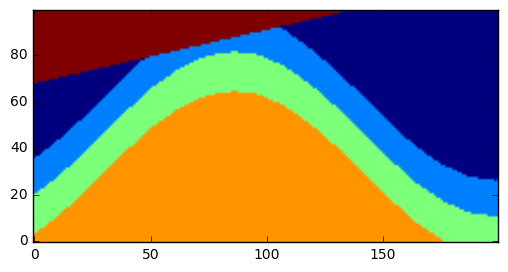

In [127]:
data.browse_sections()

In [129]:
data.db.trace_names

[['Metropolis_fold_amplitude_adaptive_scale_factor',
  'Metropolis_fold_wavelength_adaptive_scale_factor',
  'Metropolis_layer2_height_adaptive_scale_factor',
  'Metropolis_layer3_height_adaptive_scale_factor',
  'Metropolis_like_topology_003_005_adaptive_scale_factor',
  'Metropolis_unconformity_height_adaptive_scale_factor',
  'Metropolis_unconformity_rotation_adaptive_scale_factor',
  'deviance',
  'fold_amplitude',
  'fold_wavelength',
  'layer2_height',
  'layer3_height',
  'like_topology_003_005',
  'pynoddy_model',
  'unconformity_height',
  'unconformity_rotation',
  'pynoddy_topology']]

In [3]:
traces = ['fold_amplitude',
  'fold_wavelength',
  'layer2_height',
  'layer3_height',
  'unconformity_height',
  'unconformity_rotation']

In [137]:
traces

['fold_amplitude',
 'fold_wavelength',
 'layer2_height',
 'layer3_height',
 'unconformity_height',
 'unconformity_rotation']

In [4]:
ex = pynoddy.experiment.Experiment("init.his")
ex.events[1].layers[1].properties["Height"] = np.mean(data.db.trace("layer3_height")[:])
ex.events[1].layers[2].properties["Height"] = np.mean(data.db.trace("layer2_height")[:])
    
# modify event 3: fold
ex.events[2].properties["Amplitude"] = np.mean(data.db.trace("fold_amplitude")[:])
ex.events[2].properties["Wavelength"] = np.mean(data.db.trace("fold_wavelength")[:])

# modify event 4: unconformity
ex.events[3].properties["Z"] = np.mean(data.db.trace("unconformity_height")[:])
ex.events[3].properties["Dip"] = np.mean(data.db.trace("unconformity_rotation")[:])

In [5]:
def plot_stuff(experiment_object, title=None, savefig=None, ax=None):
    if ax is None:
        ax = plt.axes()
    
    ex.plot_section("y", ax=ax)
    
    if title is None:
        ax.set_title("")
    else:
        ax_set_title(title)
    
    ax.set_ylim(0,100)
    ax.set_xlim(0,200)
    ax.set_ylabel("z [# Voxel]")
    ax.set_xlabel("x [# Voxel]")
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    
    plt.tight_layout()
    
    if savefig is not None:
        plt.savefig(savefig)
        print("Figure saved unter as: ",savefig)

('Figure saved unter as: ', 'PGM2_5_noddy_mean_posterior.pdf')


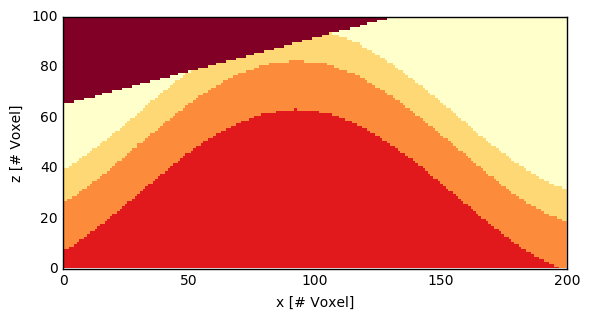

In [6]:
plot_stuff(ex, savefig="PGM2_5_noddy_mean_posterior.pdf")

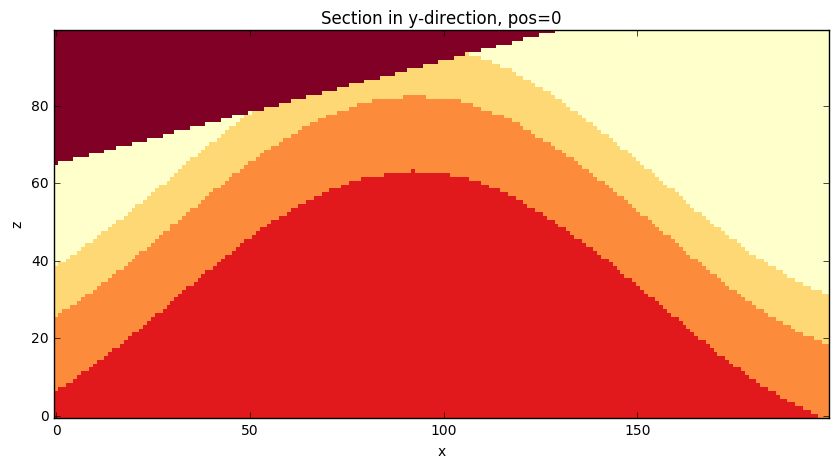

In [147]:
ex.plot_section()

In [57]:
data.compute_entropy()

Per-voxel IE has been saved into self.entropy_voxels and the total IE into self.entropy_total.


In [58]:
data.entropy_total

0.41474963911657908

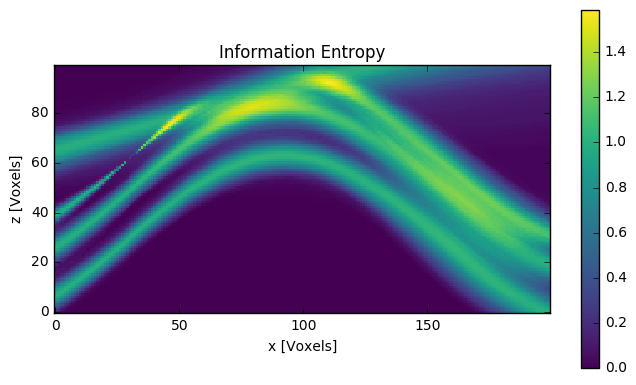

In [59]:
data.plot_entropy()

(array([    5.,     8.,    95.,   401.,  1067.,  1686.,  1172.,   509.,
           43.,    14.]),
 array([ 409.00329945,  452.50028472,  495.99727   ,  539.49425527,
         582.99124054,  626.48822582,  669.98521109,  713.48219636,
         756.97918164,  800.47616691,  843.97315218]),
 <a list of 10 Patch objects>)

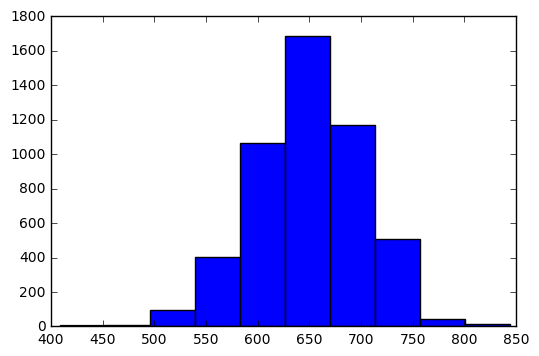

In [61]:
plt.hist(data.db.trace("unconformity_height")[:])

# GeMpy BI with Topology Likelihood

In [108]:
gempy_bi = pa.PosteriorAnalysis("PGM2_5_gempy_BI_run2.hdf5", "gempy")

In [109]:
gempy_bi.compute_entropy()

Per-voxel IE has been saved into self.entropy_voxels and the total IE into self.entropy_total.


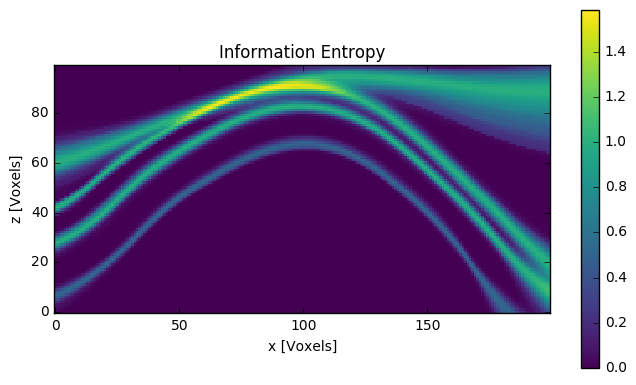

In [33]:
gempy_bi.plot_entropy()

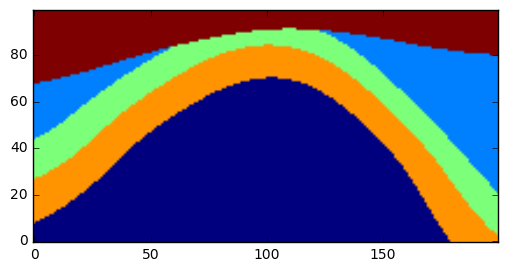

In [24]:
gempy_bi.browse_sections()

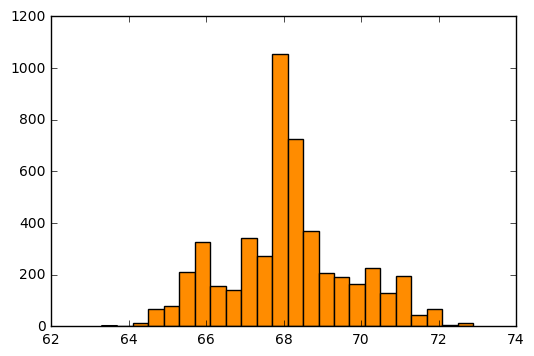

In [83]:
plt.hist(gempy_bi.db.trace("Layer3_x110_y0")[:],bins=24, color="darkorange");

In [144]:
mean_prior_interfaces = np.load("mean_prior_interfaces.npy")
mean_prior_interfaces = np.c_[mean_prior_interfaces, np.array([pymc.Normal(row[3]+"_x"+str(row[0])+"_y"+str(row[1]), row[2], 1./np.square(row[2]/10.)) for row in mean_prior_interfaces])]
mean_prior_interfaces

array([[20, 0, 54, 'Layer1',
        <pymc.distributions.Normal 'Layer1_x20_y0' at 0x0000000013027470>],
       [20, 0, 42, 'Layer2',
        <pymc.distributions.Normal 'Layer2_x20_y0' at 0x0000000013027940>],
       [20, 0, 22, 'Layer3',
        <pymc.distributions.Normal 'Layer3_x20_y0' at 0x0000000013027160>],
       [20, 0, 57, 'Layer5',
        <pymc.distributions.Normal 'Layer5_x20_y0' at 0x00000000130271D0>],
       [110, 0, 61, 'Layer3',
        <pymc.distributions.Normal 'Layer3_x110_y0' at 0x0000000013027320>],
       [110, 0, 72, 'Layer5',
        <pymc.distributions.Normal 'Layer5_x110_y0' at 0x0000000013027E10>],
       [170, 0, 49, 'Layer1',
        <pymc.distributions.Normal 'Layer1_x170_y0' at 0x0000000013027C88>],
       [170, 0, 37, 'Layer2',
        <pymc.distributions.Normal 'Layer2_x170_y0' at 0x0000000013027F28>],
       [170, 0, 17, 'Layer3',
        <pymc.distributions.Normal 'Layer3_x170_y0' at 0x0000000013027358>],
       [170, 0, 83, 'Layer5',
        <pymc.d

In [114]:
p = mean_prior_interfaces[5][4]

In [113]:
print mean_prior_interfaces[5][3],mean_prior_interfaces[5][0]

Layer5 110


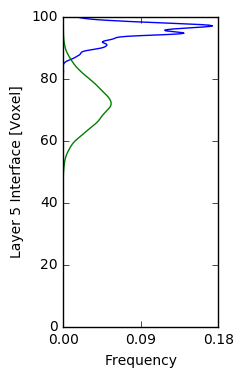

In [125]:
pts = np.linspace(0,100,500)
ev_pts = gempy_bi.kde(gempy_bi.db.trace("Layer5_x110_y0")[:]).evaluate(pts)
fig = plt.figure(figsize=(2,4))
plt.plot(ev_pts,pts)
plt.axhline(np.mean(ev_pts),pts)
plt.plot(gempy_bi.kde(np.array([p.random() for i in range(5000)])).evaluate(pts),pts)
plt.axhline(65)
plt.xticks([0,0.09,0.18])
plt.xlabel("Frequency")
plt.ylabel("Layer 5 Interface [Voxel]")

# Gempy BI without Topology Likelihood

In [106]:
gempy_BI_notopo = pa.PosteriorAnalysis("PGM2_5_gempy_BI_no_topo_run1.hdf5.hdf5","gempy")

In [107]:
gempy_BI_notopo.compute_entropy()

Per-voxel IE has been saved into self.entropy_voxels and the total IE into self.entropy_total.


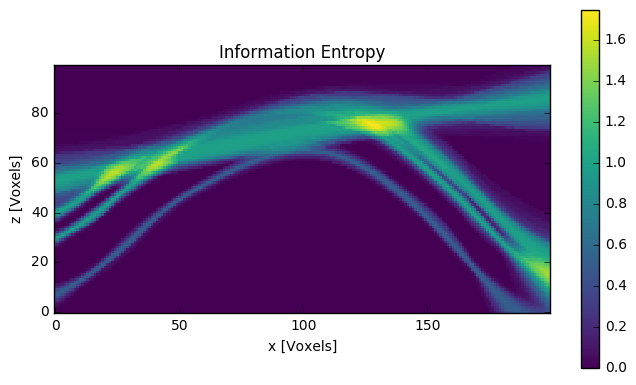

In [31]:
gempy_BI_notopo.plot_entropy()

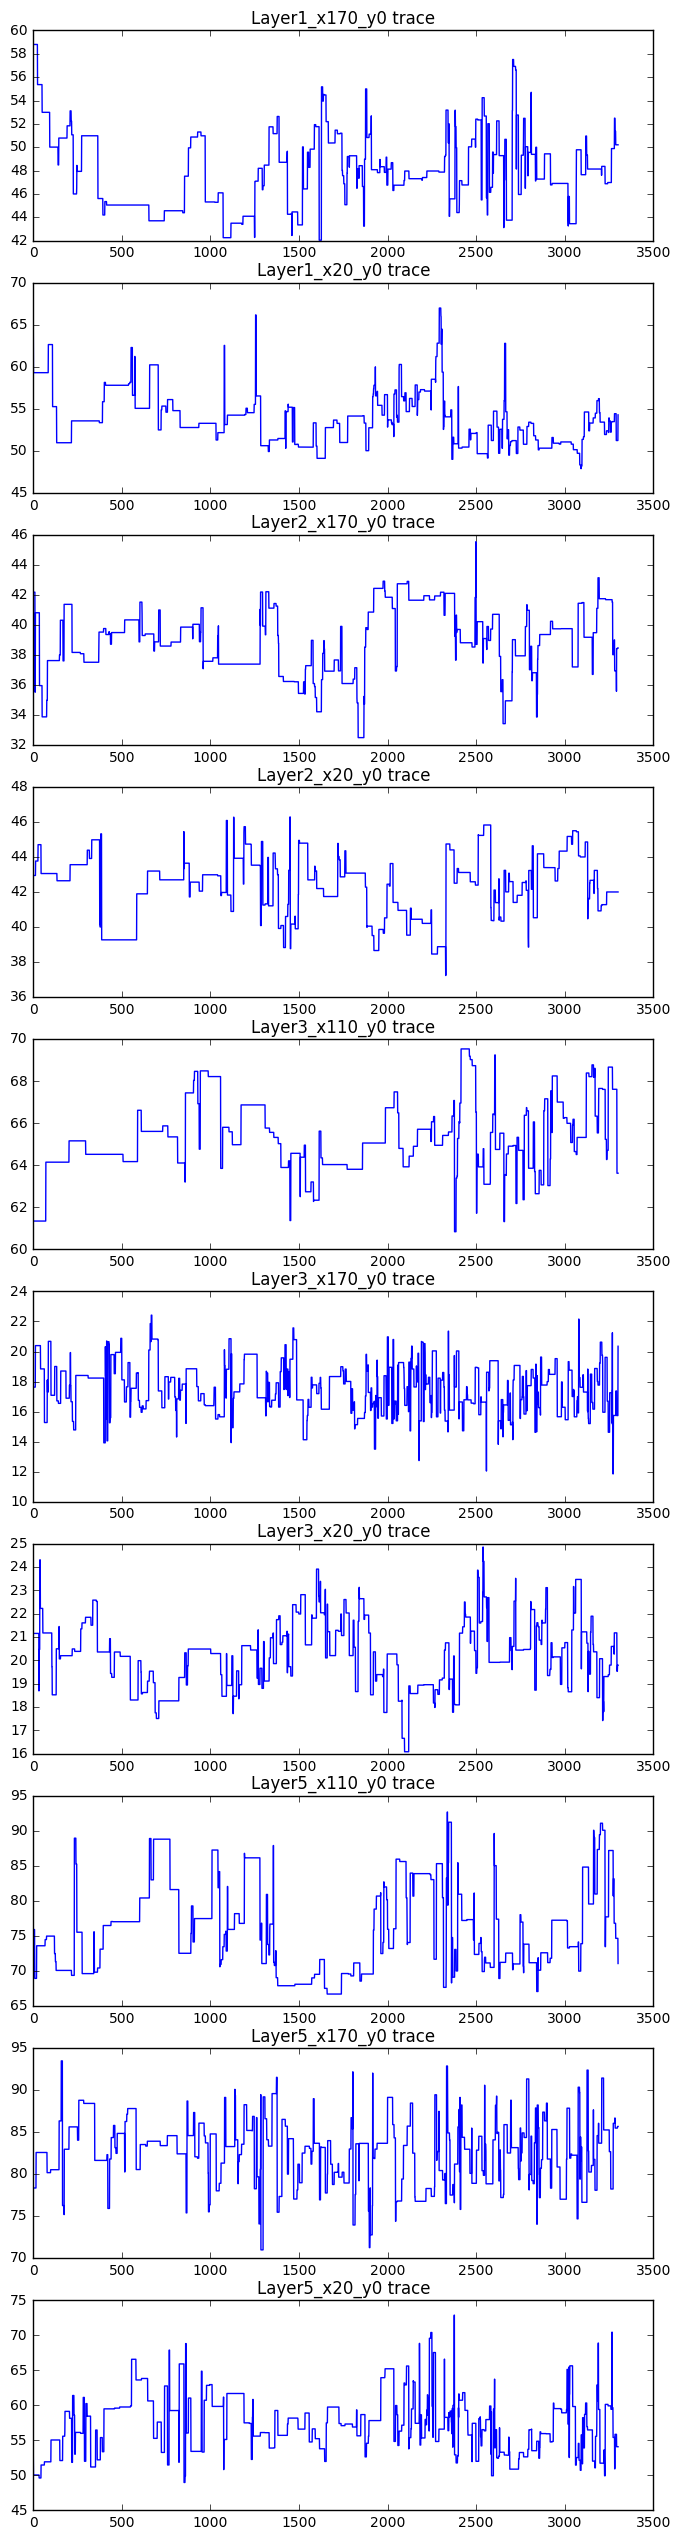

In [32]:
gempy_BI_notopo.plot_traces()

# Comparing GeMpy BI results

## IE comparison

In [117]:
gempy_BI_notopo.entropy_total

0.21982280273437499

In [118]:
gempy_bi.entropy_total

0.21423093261718751

In [105]:
import copy

In [110]:
sec_notopo = copy.copy(gempy_BI_notopo.blocks[3050][:,0,:])
sec_topo = copy.copy(gempy_bi.blocks[3050][:,0,:])

In [113]:
sec_notopo[sec_notopo==4.] = 5.
sec_topo[sec_topo==4.] = 5.

In [114]:
sec_notopo[sec_notopo==0.] = 4.
sec_topo[sec_topo==0.] = 4.

In [115]:
ie = np.array([gempy_BI_notopo.entropy_voxels[:,0,:],gempy_bi.entropy_voxels[:,0,:]])
sec = np.array([sec_notopo,sec_topo])
ie_max = np.max(ie)
print ie_max

1.7486


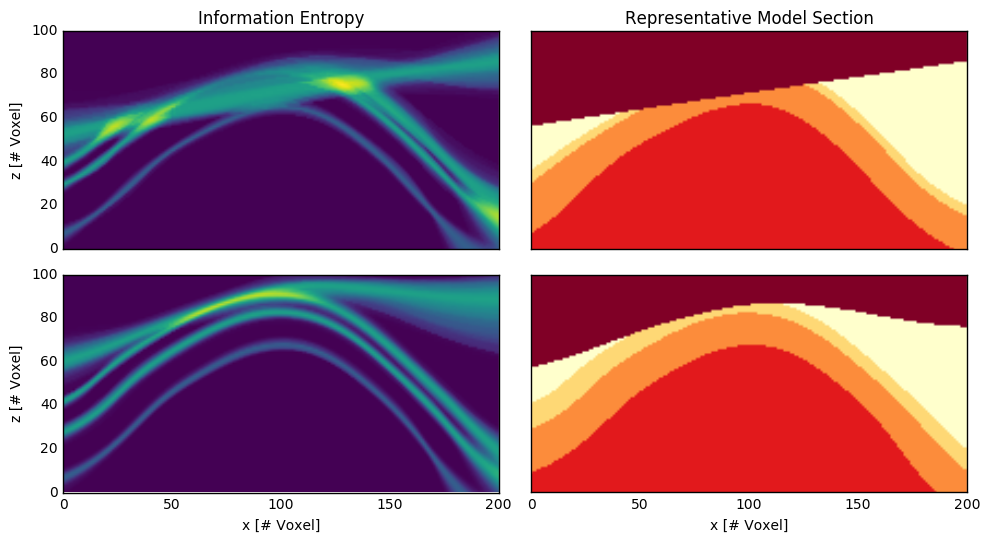

In [116]:
fig, ax = plt.subplots(nrows=2, ncols=2, sharey=True, sharex=True, figsize=(10,5.5))

for i,section in enumerate(ie):
    ax[i,0].imshow(section.T, origin="lower", cmap="viridis", vmin=0, vmax=ie_max)

for i,section in enumerate(sec):
    ax[i,1].imshow(section.T, origin="lower", cmap="YlOrRd")    
    
for row in range(2):
    
    for col in range(2):
        ax[1,col].set_xlabel("x [# Voxel]")
        ax[row,col].set_ylim(0,100)
        ax[row,col].set_xlim(0,200)
        ax[row,0].set_ylabel("z [# Voxel]")
        ax[row,col].xaxis.set_ticks_position('none')
        ax[row,col].yaxis.set_ticks_position('none')
        ax[row,col].set_adjustable('box-forced')


ax[0,0].set_title("Information Entropy")
ax[0,1].set_title("Representative Model Section")
    
plt.tight_layout()
plt.savefig("PGM2_5_composite.pdf")

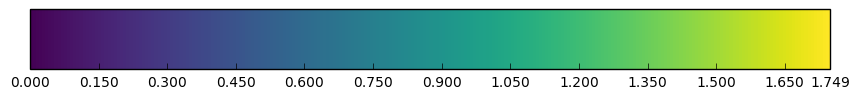

In [81]:
plt.figure(figsize=(10,1))
im = plt.imshow(ie[0], cmap="viridis", vmin=0., vmax=ie_max)
plt.gca().set_visible(False)
cax = plt.axes([0.1, 0.2, 0.8, 0.6])
cb = plt.colorbar(im, orientation="horizontal", cax=cax)
#cb.set_label("Information Entropy")
ticker = np.arange(0,1.71,0.15)
ticker = np.append(ticker,ie_max)
cb.set_ticks(ticker)


# save
plt.savefig("PGM2_5_composite_cbar.pdf")

In [171]:
pts = np.linspace(0,100,500)
ev_l5_1 = gempy_bi.kde(gempy_bi.db.trace("Layer5_x20_y0")[:]).evaluate(pts)
ev_l5_2 = gempy_bi.kde(gempy_bi.db.trace("Layer5_x110_y0")[:]).evaluate(pts)
ev_l5_3 = gempy_bi.kde(gempy_bi.db.trace("Layer5_x170_y0")[:]).evaluate(pts)
l5 = np.array([ev_l5_1,ev_l5_2,ev_l5_3])

l5_pr1=gempy_bi.kde(np.array([mean_prior_interfaces[3][4].random() for i in range(10000)])).evaluate(pts)
l5_pr2=gempy_bi.kde(np.array([mean_prior_interfaces[5][4].random() for i in range(10000)])).evaluate(pts)
l5_pr3=gempy_bi.kde(np.array([mean_prior_interfaces[9][4].random() for i in range(10000)])).evaluate(pts)
priorl5 = np.array([l5_pr1,l5_pr2,l5_pr3])

In [205]:
def get_dists(layer, pa_instance, mpi, pts=np.linspace(0,100,500)):
    l_post = []
    l_prior = []
    x_pos = []
    for entry in mpi:
        if layer in entry[3]:
            l_post.append(gempy_bi.kde(pa_instance.db.trace(layer+"_x"+str(entry[0])+"_y"+str(entry[1]))[:]).evaluate(pts))        
            
            l_prior.append(pa_instance.kde(np.array([entry[4].random() for i in range(10000)])).evaluate(pts))
            x_pos.append(entry[0])
    
    return (np.array(l_post),np.array(l_prior),np.array(x_pos))

In [174]:
ev_l3_1 = gempy_bi.kde(gempy_bi.db.trace("Layer3_x20_y0")[:]).evaluate(pts)
ev_l3_2 = gempy_bi.kde(gempy_bi.db.trace("Layer3_x110_y0")[:]).evaluate(pts)
ev_l3_3 = gempy_bi.kde(gempy_bi.db.trace("Layer3_x170_y0")[:]).evaluate(pts)
l3 = np.array([ev_l3_1,ev_l3_2,ev_l3_3])

l3_pr1=gempy_bi.kde(np.array([mean_prior_interfaces[2][4].random() for i in range(10000)])).evaluate(pts)
l3_pr2=gempy_bi.kde(np.array([mean_prior_interfaces[4][4].random() for i in range(10000)])).evaluate(pts)
l3_pr3=gempy_bi.kde(np.array([mean_prior_interfaces[8][4].random() for i in range(10000)])).evaluate(pts)
priorl3 = np.array([l3_pr1,l3_pr2,l3_pr3])

In [206]:
l5 = get_dists("Layer5", gempy_bi, mean_prior_interfaces)
l1 = get_dists("Layer1", gempy_bi, mean_prior_interfaces)
l2 = get_dists("Layer2", gempy_bi, mean_prior_interfaces)
l3 = get_dists("Layer3", gempy_bi, mean_prior_interfaces)

In [246]:
well_x110 = gempy_bi.blocks[:,110,0,:]

In [258]:
x110_l2_height = []
for i in range(5000):
    x110_l2_height.append(np.where(well_x110[i,:]==2.)[0][0])
x110_l2_height = np.array(x110_l2_height)

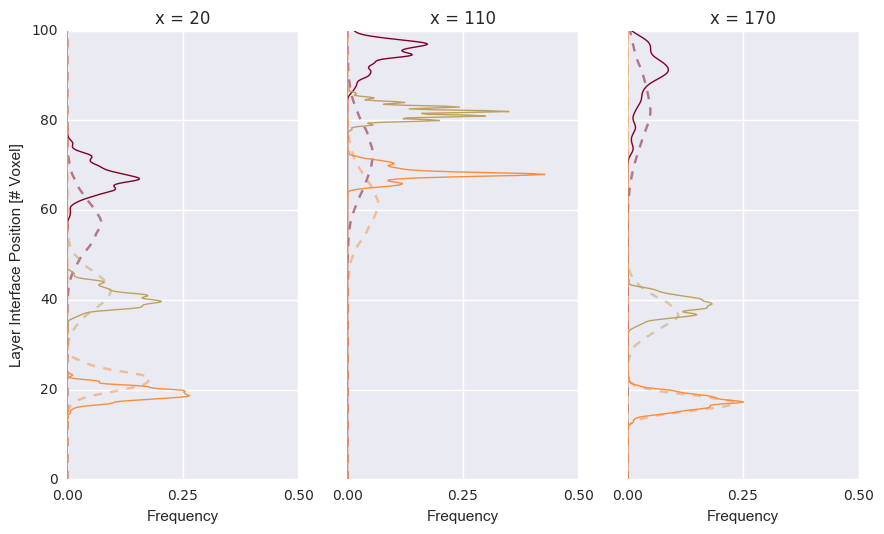

In [273]:
fig, ax = plt.subplots (nrows=1, ncols=3, figsize=(9,5.5), sharey=True)
alpha = 0.5
linewidth = 1
for i,entry in enumerate(l5[0]):
    ax[i].plot(l5[0][i],pts, color="#800026", linewidth=linewidth)
    ax[i].plot(l5[1][i],pts, "--", color="#800026",alpha=alpha)

# layer 1
#ax[0].plot(l1[0][0],pts, color="#FFFFCC")
#ax[0].plot(l1[1][0],pts, color="#FFFFCC",alpha=alpha)
#ax[2].plot(l1[0][1],pts, color="#FFFFCC")
#ax[2].plot(l1[1][1],pts, color="#FFFFCC",alpha=alpha)

# layer 2
ax[0].plot(l2[0][0],pts, color="#BFA15E", linewidth=linewidth)
ax[0].plot(l2[1][0],pts, "--", color="#BFA15E",alpha=alpha)

ax[1].plot(gempy_bi.kde(x110_l2_height).evaluate(pts),pts,color="#BFA15E", linewidth=linewidth)

ax[2].plot(l2[0][1],pts, color="#BFA15E", linewidth=linewidth)
ax[2].plot(l2[1][1],pts, "--", color="#BFA15E",alpha=alpha)

# layer 3
for i,entry in enumerate(l3[0]):
    ax[i].plot(l3[0][i],pts, color="#FC8C3B", linewidth=linewidth)
    ax[i].plot(l3[1][i],pts, "--",color="#FC8C3B",alpha=alpha)
    

#plt.axhline(np.mean(ev_pts),pts)
#plt.axhline(65)
for col in range(3):
    ax[col].set_xlabel("Frequency")
    ax[col].set_xticks([0,0.25,0.5])
    ax[col].yaxis.set_ticks_position('none')
    ax[col].xaxis.set_ticks_position('none')
    
ax[0].set_ylabel("Layer Interface Position [# Voxel]")
    
ax[0].set_title("x = 20")
ax[1].set_title("x = 110")
ax[2].set_title("x = 170")

plt.tight_layout()
plt.savefig("C:/Users/lebobcrash/Desktop/master_thesis/thesis_paper_latex/figures/PGM2_5_posterior_prior_kde.svg")

In [275]:
gempy_bi._layers

array([ 0.,  1.,  2.,  3.,  4.], dtype=float32)